# <b>Milestone 1

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What is it that we are trying to solve using data science?

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

###<b> Mounting the Drive

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### <b>Loading libraries</b>

In [3]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image, ImageEnhance

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [4]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Colab Notebooks/MIT ADSP CAPSTONE PROJECT/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [5]:
# Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [6]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
            
                train_labels.append(1)
           
            else:
           
                train_labels.append(0)
        
        except Exception:
       
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [7]:
# Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [8]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

###<b> Checking the shape of train and test images

In [9]:
# Shape of images
print(train_images.shape)
print(test_images.shape)



(24958, 64, 64, 3)
(2600, 64, 64, 3)


###<b> Checking the shape of train and test labels

In [10]:
# Shape of labels 
print(train_labels.shape)
print(test_labels.shape)

(24958,)
(2600,)


####<b> Observations and insights: The training data has 24958 images and the testing data has 2600 images; the images are 64x64 pixels and RGB having 3 layers 


### <b>Check the minimum and maximum range of pixel values for train and test images

In [11]:
# Try to use min and max function from numpy
print(np.min(train_images), np.max(train_images))
print(np.min(test_images), np.max(test_images))

0 255
0 255


####<b> Observations and insights: This is a colored image dataset with pixel values ranging from 0 to 255



###<b> Count the number of values in both uninfected and parasitized 

In [12]:
# Try to use value_counts to count the values
print(pd.Series.value_counts(train_labels))
print(pd.Series.value_counts(test_labels))
print("*"*10)



1    12582
0    12376
dtype: int64
1    1300
0    1300
dtype: int64
**********


###<b>Normalize the images

In [13]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images_norm = train_images[:]/255
train_images_norm2 = train_images_norm.astype('float32')

test_images_norm = test_images[:]/255
test_images_norm2 = test_images_norm.astype('float32')

print(type(train_images_norm2))
print(type(test_images_norm2))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


####<b> Observations and insights: It appears that most of the image section is black and the cell is at the center of the image, which is where the array has different numbers attributed to the color of the cell pixels

###<b> Plot to check if the data is balanced

1    12582
0    12376
dtype: int64
1    1300
0    1300
dtype: int64


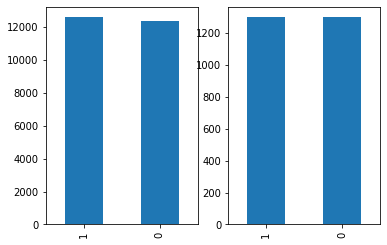

In [14]:
# You are free to use bar plot or pie-plot or count plot, etc. to plot the labels of train and test data and check if they are balanced
plt.subplot(1,2,1)
pd.Series.value_counts(train_labels).plot(kind = 'bar')
print(pd.Series.value_counts(train_labels))

plt.subplot(1,2,2)
pd.Series.value_counts(test_labels).plot(kind = 'bar')
print(pd.Series.value_counts(test_labels))

####<b> Observations and insights: The number of labels in both the training and testing datasets appear evenly balanced, given that they are almost the same in number

### <b>Data Exploration</b>
Let's visualize the images from the train data

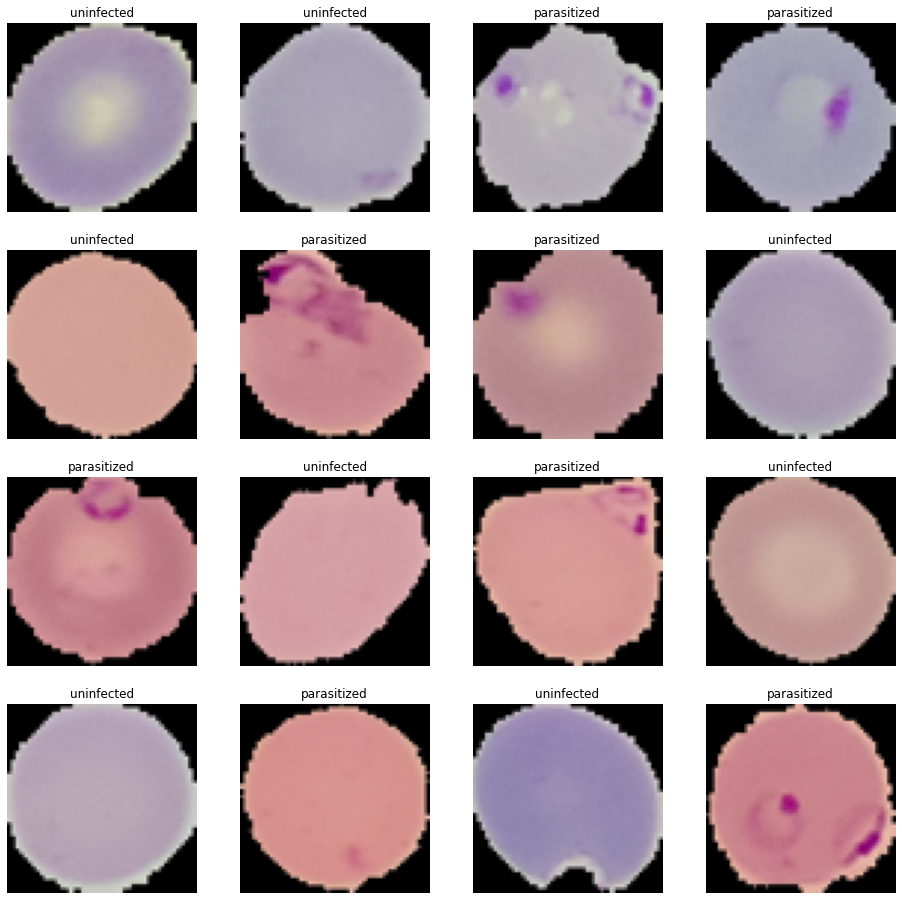

In [15]:
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1, 17):

    plt.subplot(4, 4, n)

    index = int(np.random.randint(0, train_images_norm2.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images_norm2[index])

    plt.axis('off')

####<b> Observations and insights: The parasitized images all contain a darker coloration while the uninfected images are pretty uniform in color of the cells.

###<b> Similarly visualize the images with subplot(6, 6) and figsize = (12, 12)

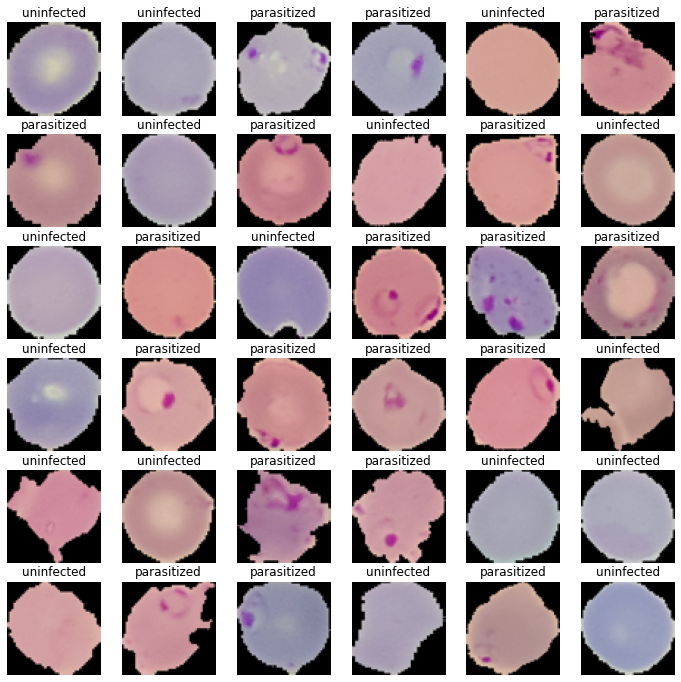

In [16]:
# Hint: Have a keen look into the number of iterations that the for loop should iterate

np.random.seed(42)

plt.figure(1, figsize = (12 , 12))

for n in range(1, 37):

    plt.subplot(6, 6, n)

    index = int(np.random.randint(0, train_images_norm2.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images_norm2[index])

    plt.axis('off')

####<b>Observations and insights: once again in a larger dataset, we see that the parasitized images contain darker more purple spots and regions while uninfected are more uniform.

###<b> Plotting the mean images for parasitized and uninfected

In [17]:
# Function to find the mean
def find_mean_img(full_mat, title):

    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]

    # Reshape it back to a matrix
    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img

<b> Mean image for parasitized

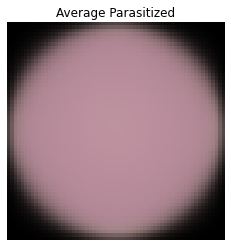

In [22]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
parasitized_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images_norm2, train_labels):

        if label == 1:
              
              parasitized_data.append([img])          

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean


<b> Mean image for uninfected

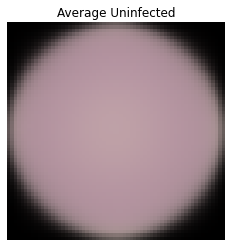

[[[  8.413962     8.480263     8.621457  ]
  [ 32.539703    28.966799    29.788956  ]
  [ 31.07638     29.91226     30.725943  ]
  ...
  [-16.465197   -12.127235   -11.344232  ]
  [-17.52602    -13.209397   -12.447345  ]
  [-12.78737     -9.623633    -9.386498  ]]

 [[  6.142027     7.6648345    8.178256  ]
  [ 20.922718    21.056025    21.637335  ]
  [ 19.203308    21.300354    20.445059  ]
  ...
  [-20.480124   -18.064241   -15.673067  ]
  [-19.071152   -15.720144   -15.119904  ]
  [-14.298528   -11.088126   -10.446329  ]]

 [[ 13.108072    13.38286     13.537241  ]
  [ 15.507498    17.326221    18.921549  ]
  [  3.6708443    9.545395    10.279751  ]
  ...
  [-40.062443   -33.324665   -28.061672  ]
  [-23.423553   -19.724173   -17.819078  ]
  [ -6.0236506   -3.2895179   -2.6223934 ]]

 ...

 [[  3.4254396    4.1262155    3.0466678 ]
  [ 22.91092     20.62957     19.590557  ]
  [ 14.681485    15.744784    13.826539  ]
  ...
  [-66.21721    -54.374424   -54.711906  ]
  [-33.58846    -2

In [19]:
# Similarly write the code to find the mean image of uninfected
uninfected_data = []  # Create a list to store the uninfected data

for img, label in zip(train_images_norm2, train_labels):

        if label == 0:
              
              uninfected_data.append([img])          

uninfected_mean = find_mean_img(np.array(uninfected_data), 'Uninfected')   # find the mean
print((uninfected_mean - parasitized_mean)*255*255)


####<b> Observations and insights: Images look about the same

### <b>Converting RGB to HSV of Images using OpenCV

In [23]:
print(train_images_norm2[:])

[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0

###<b> Converting the train data

In [65]:
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, train_labels.shape[0], 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
  
  gfx.append(a)

gfx = np.array(gfx)

In [66]:
viewimage = np.random.randint(0, 20000, 5)
print(viewimage)

for t, i in zip(range(5), viewimage):
  print(t, i, train_labels[i])


[11589 18895 15708 17043  2811]
0 11589 1
1 18895 0
2 15708 0
3 17043 0
4 2811 1


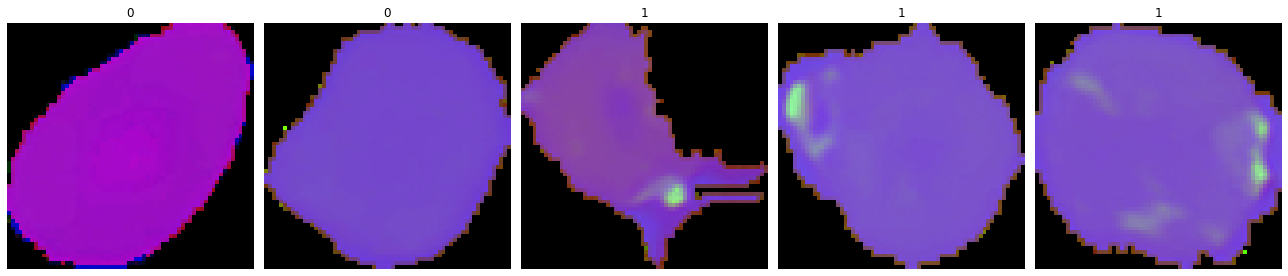

In [67]:
viewimage = np.random.randint(1, train_labels.shape[0], 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

###<b> Converting the test data

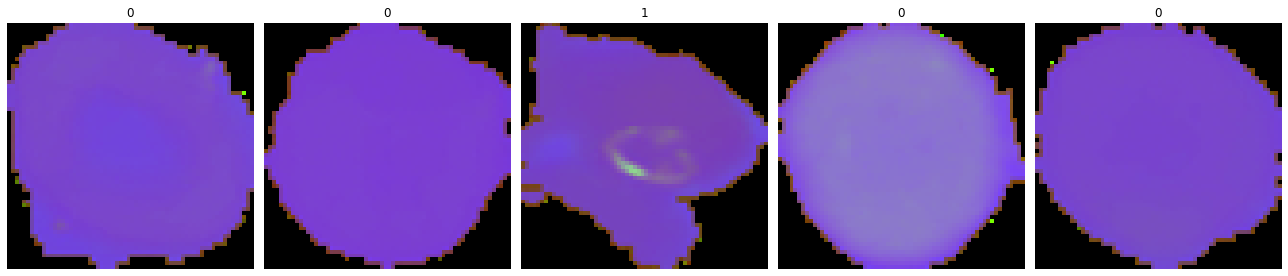

In [68]:
# Similarly you can visualize for the images in the test data

gfx=[]   # to hold the HSV image array

for i in np.arange(0, test_labels.shape[0], 1):

  a = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)
  
  gfx.append(a)

gfx = np.array(gfx)

viewimage = np.random.randint(1, test_labels.shape[0], 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

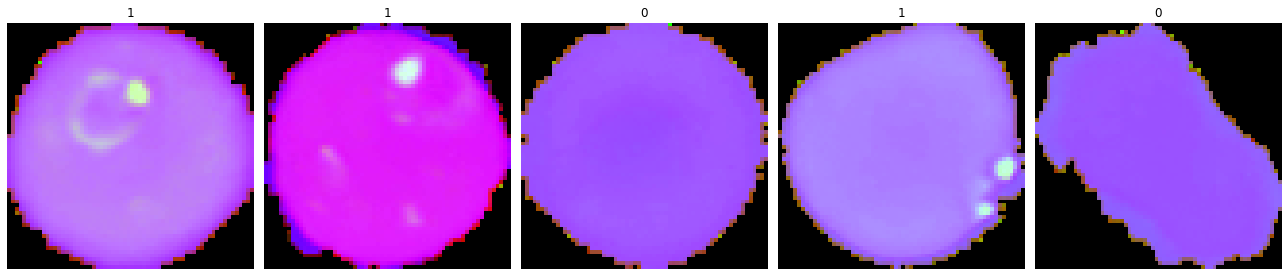

In [94]:

gfx=[]   # to hold the HSV image array

for i in np.arange(0, test_labels.shape[0], 1):

  a = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)

  a2 = a

  a2 = cv2.add(a2,np.array([-15.]),a2)

  a2 = cv2.multiply(a2,np.array([1.5]),a2)
  
  gfx.append(a2)

gfx = np.array(gfx)

viewimage = np.random.randint(1, test_labels.shape[0], 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

####<b>Observations and insights: We now see for the infected images, the parasite shows up as green in the HSV colouring

###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

In [42]:
gbx = []  # To hold the blurred images

for i in np.arange(0, train_labels.shape[0], 1):

  b = cv2.GaussianBlur(train_images_norm2[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

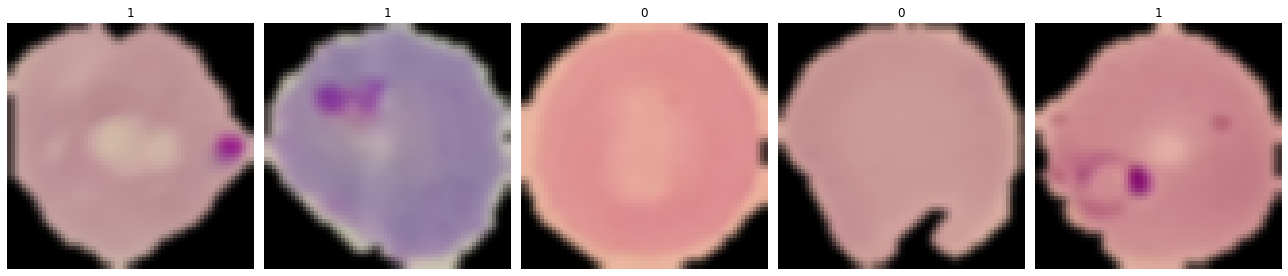

In [43]:
viewimage = np.random.randint(1, train_labels.shape[0], 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

###<b> Gaussian Blurring on test data

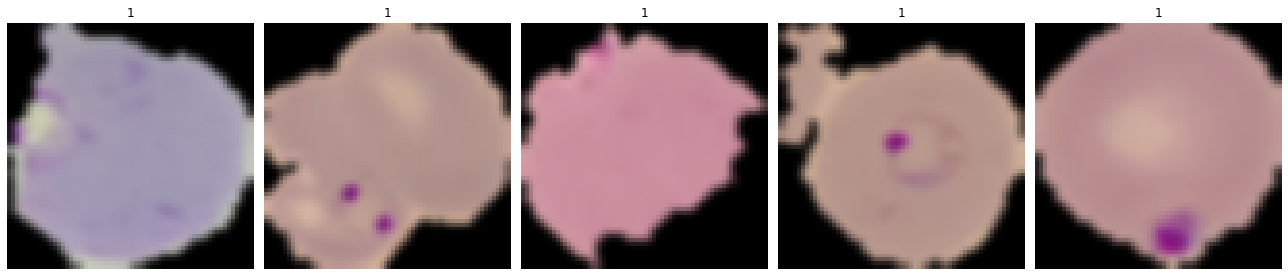

In [47]:
# Similarly you can apply Gaussian blurring for the images in the test data

gbx = []  # To hold the blurred images

for i in np.arange(0, test_labels.shape[0], 1):

  b = cv2.GaussianBlur(test_images_norm2[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

viewimage = np.random.randint(1, test_labels.shape[0], 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

####**Observations and insights: Blurring the images brings pixels that are closer in color together and may help with defining the darker areas from the lighter areas; i.e. averaging out steep changes in pixel intensity, however a caveat is a poorer resolution and likely a difficulty identifying boundaries**

**Think About It:** Would blurring help us for this problem statement in any way? What else can we try?

## **Proposed approach**

**Potential techniques:** What different techniques should be explored?<br>
**Overall solution design:** What is the potential solution design?<br>
**Measures of success:** What are the key measures of success to compare different techniques?<br>